<a href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/08_LEARN_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08-LEARN-DataAnalysisML

In [37]:
import pandas as pd
import matplotlib as plt

This is the data after data processing in the previous notebook. 

Lets setup AutoML

In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_341"; Java(TM) SE Runtime Environment (build 1.8.0_341-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpso84fun0
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpso84fun0/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpso84fun0/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,22 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_lucaslevassor_g81mwp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


### Import out dataframe to h20 object

Train a model based on the target and the df

In [4]:
# Run ML with new input 

new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_reseq.csv')
new_input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
161,yp51_E05,8,3,6,8,0.000000
162,yp51_E07,8,1,8,9,6.795506
163,yp51_E08,8,4,5,9,0.668263
164,yp51_E11,8,3,7,10,0.000000


In [6]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.566265060240965,2.6927710843373482,6.566265060240965,5.319277108433736,17.20841465493667
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.2519635665513875,1.1581890914364779,1.1723353650321857,2.8392042347076565,40.8029369946811
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_A02,1.0,3.0,8.0,1.0,0.2694007038642038
2,yp49_A04,1.0,3.0,8.0,2.0,0.2026994926097329


In [7]:
# Since the data is categorical we need to make it from numerical to categorical 

df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [8]:
df_test.describe()

Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,17.20841465493667
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,40.8029369946811
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.972700677969159
1,yp49_A02,1,3,8,1,0.2694007038642038
2,yp49_A04,1,3,8,2,0.2026994926097329


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


### RUN automl

Here we are defining the autoML object and after we can train it

In [9]:
# Select the columns we want to train on
feature_cols = [0, 1, 2, 3]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [10]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |
10:13:02.239: _train param, Dropping bad and constant columns: [Line Name]


10:13:04.539: _train param, Dropping bad and constant columns: [Line Name]

█
10:13:05.572: _train param, Dropping bad and constant columns: [Line Name]
10:13:05.572: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 166.0.
10:13:05.593: _train param, Dropping unused columns: [Line Name]
10:13:06.7: _train param, Dropping bad and constant columns: [Line Name]

█
10:13:06.981: _train param, Dropping bad and constant columns: [Line Name]

█
10:13:08.449: _train param, Dropping bad and constant columns: [Line Name]

█
10:13:09.583: _train param, Dropping bad and constant columns: [Line Name]
10:13:10.133: _train param, Dropping bad and constant columns: [Line Name]

█
10:13:10.751: _train param, Dropping unused columns: [Line Name]
10:13:11.16: _train param, Dropping unused columns: [Line Name]
10:13:11.267: _trai

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,19,Input,20.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.15564,0.369549,0.0,0.000535,0.144127,0.454276,0.24974
2,,3,100,RectifierDropout,0.0,0.0,0.0,0.008342,0.05757,0.0,-0.002666,0.108549,1.002984,0.037382
3,,4,1,Linear,,0.0,0.0,0.000118,0.000143,0.0,0.019863,0.16252,0.001191,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 386.3359675165175
RMSE: 19.65543099289653
MAE: 11.408885208222173
RMSLE: NaN
Mean Residual Deviance: 386.3359675165175

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 563.1355570413674
RMSE: 23.73047738755728
MAE: 13.350211580105588
RMSLE: NaN
Mean Residual Deviance: 563.1355570413674

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,13.332624,4.085403,16.252085,10.134378,13.678423,8.405845,18.192390
1,mean_residual_deviance,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
2,mse,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
3,r2,0.606563,0.225403,0.261702,0.842911,0.768373,0.600344,0.559485
4,residual_deviance,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
5,rmse,22.481600,8.421642,26.904335,16.437662,24.935488,11.547696,32.582817
6,rmsle,1.580522,0.235170,NaN,NaN,1.746813,NaN,1.414232



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-09-19 10:53:53,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-09-19 10:53:53,7 min 23.894 sec,14561 obs/sec,10.0,1,1660.0,31.653236,1001.927368,18.887887,0.394551
2,,2022-09-19 10:53:59,7 min 28.995 sec,15983 obs/sec,500.0,50,83000.0,20.898010,436.726839,10.115131,0.736093
3,,2022-09-19 10:54:04,7 min 34.093 sec,16630 obs/sec,1030.0,103,170980.0,18.335805,336.201760,8.743034,0.796839
4,,2022-09-19 10:54:08,7 min 38.645 sec,17029 obs/sec,1520.0,152,252320.0,19.655431,386.335968,11.408885,0.766543



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.080060
1,0.8,0.917874,0.917874,0.073485
2,0.5,0.890808,0.890808,0.071318
3,2.7,0.828825,0.828825,0.066355
4,1.2,0.817504,0.817504,0.065449
5,2.8,0.807725,0.807725,0.064666
6,0.2,0.777968,0.777968,0.062284
7,1.3,0.766015,0.766015,0.061327
8,1.1,0.751591,0.751591,0.060172
9,2.5,0.728415,0.728415,0.058317


In [11]:
print('DOOOOOOONE')

DOOOOOOONE


## Processing model


In [12]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [13]:
len(model_ids)

503

Now we want to extract the best models that are not StackedEnsemble

In [14]:

df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,DeepLearning_grid_2_AutoML_1_20220919_101302_model_8,23.730477,563.135557,13.350212,NaN,563.135557
1,DeepLearning_grid_1_AutoML_1_20220919_101302_model_252,23.974514,574.777319,11.216006,NaN,574.777319
2,StackedEnsemble_BestOfFamily_5_AutoML_1_20220919_101302,24.373906,594.087316,13.328962,NaN,594.087316
3,DeepLearning_grid_1_AutoML_1_20220919_101302_model_114,24.455603,598.076533,11.775838,NaN,598.076533
4,DeepLearning_grid_2_AutoML_1_20220919_101302_model_7,24.531929,601.815549,14.160631,NaN,601.815549
...,...,...,...,...,...,...
512,DeepLearning_1_AutoML_1_20220919_101302,36.487988,1331.373248,20.781019,NaN,1331.373248
513,XGBoost_grid_1_AutoML_1_20220919_101302_model_13,36.961483,1366.151248,17.438055,NaN,1366.151248
514,XGBoost_grid_1_AutoML_1_20220919_101302_model_8,37.131715,1378.764276,16.353482,1.347843,1378.764276
515,DeepLearning_grid_2_AutoML_1_20220919_101302_model_17,39.220589,1538.254571,22.153560,NaN,1538.254571


In [15]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20220919_101302_model_8,23.7305,563.136,13.3502,nan,563.136
DeepLearning_grid_1_AutoML_1_20220919_101302_model_252,23.9745,574.777,11.216,nan,574.777
DeepLearning_grid_1_AutoML_1_20220919_101302_model_114,24.4556,598.077,11.7758,nan,598.077
DeepLearning_grid_2_AutoML_1_20220919_101302_model_7,24.5319,601.816,14.1606,nan,601.816
DeepLearning_grid_1_AutoML_1_20220919_101302_model_74,24.5441,602.412,11.2043,nan,602.412
DeepLearning_grid_1_AutoML_1_20220919_101302_model_122,24.7721,613.656,12.0107,nan,613.656
DeepLearning_grid_3_AutoML_1_20220919_101302_model_1,24.8863,619.327,12.1525,nan,619.327
DeepLearning_grid_3_AutoML_1_20220919_101302_model_7,25.0538,627.692,13.6635,nan,627.692
DeepLearning_grid_1_AutoML_1_20220919_101302_model_263,25.1182,630.925,13.3261,nan,630.925
DeepLearning_grid_1_AutoML_1_20220919_101302_model_125,25.1432,632.178,11.6502,nan,632.178


### Saving the best model

In [16]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20220919_101302_model_8


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 12,201 weights/biases, 148.9 KB, 252,320 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,19,Input,20.0,,,,,,,,,
1,,2,100,RectifierDropout,0.0,0.0,0.0,0.15564,0.369549,0.0,0.000535,0.144127,0.454276,0.24974
2,,3,100,RectifierDropout,0.0,0.0,0.0,0.008342,0.05757,0.0,-0.002666,0.108549,1.002984,0.037382
3,,4,1,Linear,,0.0,0.0,0.000118,0.000143,0.0,0.019863,0.16252,0.001191,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 386.3359675165175
RMSE: 19.65543099289653
MAE: 11.408885208222173
RMSLE: NaN
Mean Residual Deviance: 386.3359675165175

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 563.1355570413674
RMSE: 23.73047738755728
MAE: 13.350211580105588
RMSLE: NaN
Mean Residual Deviance: 563.1355570413674

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,13.332624,4.085403,16.252085,10.134378,13.678423,8.405845,18.192390
1,mean_residual_deviance,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
2,mse,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
3,r2,0.606563,0.225403,0.261702,0.842911,0.768373,0.600344,0.559485
4,residual_deviance,562.161560,370.235500,723.843260,270.196720,621.778560,133.349290,1061.640000
5,rmse,22.481600,8.421642,26.904335,16.437662,24.935488,11.547696,32.582817
6,rmsle,1.580522,0.235170,NaN,NaN,1.746813,NaN,1.414232



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-09-19 10:53:53,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-09-19 10:53:53,7 min 23.894 sec,14561 obs/sec,10.0,1,1660.0,31.653236,1001.927368,18.887887,0.394551
2,,2022-09-19 10:53:59,7 min 28.995 sec,15983 obs/sec,500.0,50,83000.0,20.898010,436.726839,10.115131,0.736093
3,,2022-09-19 10:54:04,7 min 34.093 sec,16630 obs/sec,1030.0,103,170980.0,18.335805,336.201760,8.743034,0.796839
4,,2022-09-19 10:54:08,7 min 38.645 sec,17029 obs/sec,1520.0,152,252320.0,19.655431,386.335968,11.408885,0.766543



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.080060
1,0.8,0.917874,0.917874,0.073485
2,0.5,0.890808,0.890808,0.071318
3,2.7,0.828825,0.828825,0.066355
4,1.2,0.817504,0.817504,0.065449
5,2.8,0.807725,0.807725,0.064666
6,0.2,0.777968,0.777968,0.062284
7,1.3,0.766015,0.766015,0.061327
8,1.1,0.751591,0.751591,0.060172
9,2.5,0.728415,0.728415,0.058317


In [17]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

### Exporting the leaderboard

In [19]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### Importing the leaderboard

In [24]:
models_path = "ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20220919_101302_model_8,23.7305,563.136,13.3502,nan,563.136
DeepLearning_grid_1_AutoML_1_20220919_101302_model_252,23.9745,574.777,11.216,nan,574.777
StackedEnsemble_BestOfFamily_5_AutoML_1_20220919_101302,24.3739,594.087,13.329,nan,594.087
DeepLearning_grid_1_AutoML_1_20220919_101302_model_114,24.4556,598.077,11.7758,nan,598.077
DeepLearning_grid_2_AutoML_1_20220919_101302_model_7,24.5319,601.816,14.1606,nan,601.816
DeepLearning_grid_1_AutoML_1_20220919_101302_model_74,24.5441,602.412,11.2043,nan,602.412
DeepLearning_grid_1_AutoML_1_20220919_101302_model_122,24.7721,613.656,12.0107,nan,613.656
StackedEnsemble_BestOfFamily_7_AutoML_1_20220919_101302,24.7863,614.359,12.9869,nan,614.359
DeepLearning_grid_3_AutoML_1_20220919_101302_model_1,24.8863,619.327,12.1525,nan,619.327
DeepLearning_grid_3_AutoML_1_20220919_101302_model_7,25.0538,627.692,13.6635,nan,627.692


## Importing the best model

In [26]:
# old best model DeepLearning_grid_2_AutoML_1_20220727_100352_model_37

best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models/DeepLearning_grid_2_AutoML_1_20220919_101302_model_8")
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### Investigate model

In [27]:
best_model.cross_validation_holdout_predictions()

predict
8.55008
8.32859
6.2953
14.3893
4.68085
-2.45985
3.8736
3.23858
-4.03058
4.68085


Get the cross validation predictions

In [28]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
8.55008
8.32859
6.2953
14.3893
4.68085
-2.45985
3.8736
3.23858
-4.03058
4.68085



166


In [29]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_DeepLearning_grid_2_AutoML_1_20220919_101302_model_8'

In [30]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
116,4.812122
117,11.587125
118,40.120493
119,41.953396
120,13.211056
121,2.622277
122,9.193682
123,-1.030649
124,34.099990
125,40.648411


In [31]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [32]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [33]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3.head(50)

,Line Name,0,1,2,3,Amt_norm,predict
0,yp49_A01,1,2,5,1,0.972701,8.550079
1,yp49_A02,1,3,8,1,0.269401,8.328590
2,yp49_A04,1,3,8,2,0.202699,6.295297
3,yp49_A06,1,2,6,2,1.133272,14.389318
4,yp49_A07,1,1,5,3,0.981070,4.680850
5,yp49_A08,1,1,8,3,0.223689,-2.459850
6,yp49_A09,1,3,7,3,0.000000,3.873599
7,yp49_B02,1,2,8,5,0.255908,3.238585
8,yp49_B03,1,1,8,5,0.000000,-4.030575
9,yp49_B04,1,1,5,6,0.000000,4.680850


<AxesSubplot:xlabel='Line Name'>

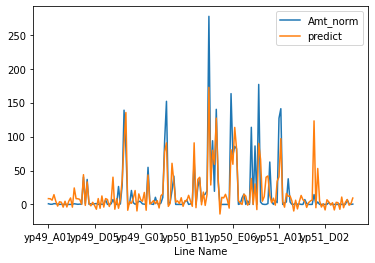

In [34]:
df3.plot(y = ['Amt_norm','predict'], x =  'Line Name')

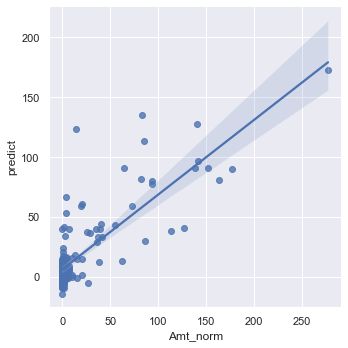

In [35]:
import seaborn as sns
from scipy.stats import pearsonr

#set seaborn plotting aesthetics as default
sns.set()

sns.set_context("paper", font_scale=6.0, rc={"lines.linewidth": 1.5})
sns.set(rc = {'figure.figsize':(20,20)})

sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis")
None

### Learning curve

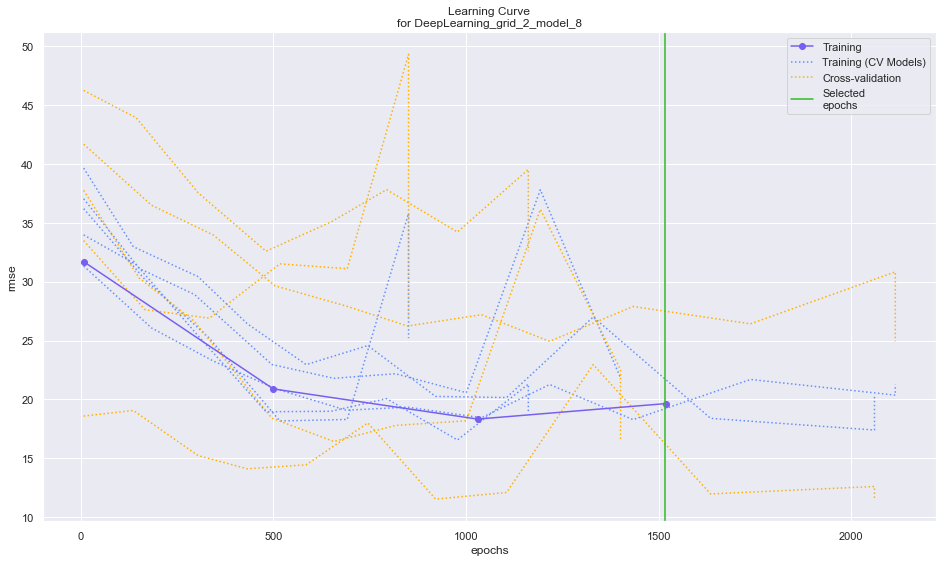

In [39]:

learning_curve = uploaded_model.learning_curve_plot()

None

In [40]:
as_data_frame_df_test

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
161,yp51_E05,8,3,6,8,0.000000
162,yp51_E07,8,1,8,9,6.795506
163,yp51_E08,8,4,5,9,0.668263
164,yp51_E11,8,3,7,10,0.000000


### Find predicted genotypes

In [41]:
import numpy as np

In [42]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [43]:

input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,1,2,5,1
1,1,3,8,1
2,1,3,8,2
3,1,2,6,2
4,1,1,5,3
...,...,...,...,...
161,8,3,6,8
162,8,1,8,9
163,8,4,5,9
164,8,3,7,10


### Getting rid of the genotypes we have already tested:

In [44]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [45]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [47]:
len(predicted)

1122

In [48]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,-1.369494
1,-1.369494
2,-1.369494
3,-1.369494
4,-1.369494


In [49]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15219/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
694,5,2,6,5,189.725366
693,5,2,6,4,189.725366
690,5,2,6,1,189.725366
697,5,2,6,8,189.725366
696,5,2,6,7,189.725366
...,...,...,...,...,...
723,5,3,5,4,-17.638201
722,5,3,5,3,-17.638201
720,5,3,5,1,-17.638201
729,5,3,5,10,-17.638201


If we want the names on the genotypes we can do the following: 

In [50]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## Top 20 predicted producers

In [51]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_stric_production']
df_with_genotypes.head(20)


,G8H,pG8H,pCPR,CPR,Predicted_stric_production
0,Smus,ENO2,TPI1,Rse,189.725366
1,Smus,ENO2,TPI1,Clo,189.725366
2,Smus,ENO2,TPI1,Cro,189.725366
3,Smus,ENO2,TPI1,Cac,189.725366
4,Smus,ENO2,TPI1,Ani,189.725366
5,Smus,ENO2,TPI1,Ahu,189.725366
6,Smus,ENO2,TPI1,Cpo,189.725366
7,Smus,ENO2,TPI1,Oeu,189.725366
8,Smus,ENO2,TPI1,Aan,189.725366
9,Smus,ENO2,CCW12,Ani,131.280978


In [52]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/processed/ML_predicted/2022_2807_categorical_DeepLearning_grid_2_AutoML_1_20220919_101302_model_8')